This is quick simulation to make sure that using relative density is a reasonible metric to be using

In [1]:
import numpy as np
from skimage.morphology import binary_dilation, disk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
'''make a masked image that is a single 1 pixel in the middle of 100x100 zeros'''
mask = np.zeros([100, 100])
mask[49, 49] = 1

In [73]:
'''this is simulation if the intensity is uniformly distributed across the nucleus'''

areas = [] #running list of the areas. This should serve as a positive ctrl
mus = [] #this is the mean 'intensity' in the masked area
dilation_numbers = [] # the is the amou
relative_densities = []

for iter in range(50): #repeat things 50 times 
    norm_img = np.random.normal(50, 10, (100, 100)) # this is the uniformly distributed image. 
    mask_running = np.copy(mask) #this is the mask
    mu_total = np.mean(norm_img)
    for dilation in range(50): #the number of times to dilate the mask
        dilation_numbers.append(dilation) #keep track of the number of times that the mask has been dilated
        test_img = np.multiply(mask_running, norm_img) #multiply the masked image by the uniformly distributed image
        areas.append(np.sum(mask_running)) #keep track of the area
        mu_mask = np.mean(test_img[test_img > 0])
        mus.append(mu_mask) #get the mean intensity in the masked region
        relative_densities.append(mu_mask / mu_total)
        mask_running = binary_dilation(mask_running, disk(1)) #dilate the mask by one pixel

In [76]:
df = pd.DataFrame({'areas' : areas,
                 'mus' : mus,
                 'dilation' : dilation_numbers,
                  'relative_density' : relative_densities})

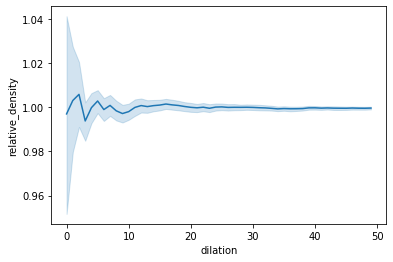

In [77]:
sns.lineplot(df.dilation, df.relative_density)

In [83]:
'''this is simulation this is simulation of there being highest intensity around the center of the mask'''

areas = [] #running list of the areas. This should serve as a positive ctrl
mus = [] #this is the mean 'intensity' in the masked area
dilation_numbers = [] # the is the amou

relative_densities = []

for iter in range(50): #repeat things 50 times 
    norm_img = np.random.normal(50, 10, (100, 100)) # this is the uniformly distributed image. 
    bright_spot = np.random.normal(100, 10, (10, 10)) #mask a random bright 10 x 10 square
    norm_img[45:55, 45:55] = bright_spot # put the bright square in the middle of 
    mask_running = np.copy(mask) #this is the mask
    mu_total = np.mean(norm_img)
    for dilation in range(25): #the number of times to dilate the mask
        dilation_numbers.append(dilation) #keep track of the number of times that the mask has been dilated
        test_img = np.multiply(mask_running, norm_img) #multiply the masked image by the uniformly distributed image
        areas.append(np.sum(mask_running)) #keep track of the area
        mu_mask = np.mean(test_img[test_img > 0])
        mus.append(mu_mask) #get the mean intensity in the masked region
        relative_densities.append(mu_mask / mu_total)
        mask_running = binary_dilation(mask_running, disk(1)) #dilate the mask by one pixel

In [84]:
df = pd.DataFrame({'areas' : areas,
                 'mus' : mus,
                 'dilation' : dilation_numbers,
                  'relative_density' : relative_densities})

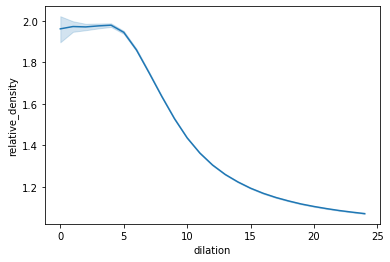

In [86]:
sns.lineplot(df.dilation, df.relative_density)

In [9]:
'''this is simulation this is simulation of there being highest intensity in area just outside of the mask the center of the mask'''

areas = [] #running list of the areas. This should serve as a positive ctrl
mus = [] #this is the mean 'intensity' in the masked area
dilation_numbers = [] # the is the amou

relative_densities = []

for iter in range(50): #repeat things 50 times 
    norm_img = np.random.normal(50, 10, (100, 100)) # this is the uniformly distributed image. 
    bright_spot = np.random.normal(100, 10, (10, 10))
    norm_img[55:65, 45:55] = bright_spot
    mask_running = np.copy(mask) #this is the mask
    mu_total = np.mean(norm_img)
    for dilation in range(40): #the number of times to dilate the mask
        dilation_numbers.append(dilation) #keep track of the number of times that the mask has been dilated
        test_img = np.multiply(mask_running, norm_img) #multiply the masked image by the uniformly distributed image
        areas.append(np.sum(mask_running)) #keep track of the area

        mu_mask = np.mean(test_img[test_img > 0])
        mus.append(mu_mask) #get the mean intensity in the masked region
        relative_densities.append(mu_mask / mu_total)
        mask_running = binary_dilation(mask_running, disk(1)) #dilate the mask by one pixel

In [10]:
df = pd.DataFrame({'areas' : areas,
                 'mus' : mus,
                 'dilation' : dilation_numbers,
                  'relative_density' : relative_densities})

In [ ]:
sns.lineplot(df.dilation, df.relative_density)

2000

In [ ]:
|